## Arbol de decisión

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
  
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score,f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier   
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV

In [3]:
# Cargar el dataset y mostrar las 5 primeras filas

data_wine = pd.read_csv("G:/Otros ordenadores/Portátil/UNAD/Semestre 6/Análisis de datos/3/wine/winequality-red.csv")
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# muiestra las dimensiones de la data
data_wine.shape

(1599, 12)

En la data original contamos con 1599 filas y 12 columnas

In [6]:
# Selecciona las características más relevantes para este caso

features = ["volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "alcohol", "sulphates"]  

# Función para eliminar valores atipicos (outliers) con IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)  
    Q3 = df[columns].quantile(0.75)  
    IQR = Q3 - Q1
    valor_bajo = Q1 - 1.5 * IQR  
    valor_alto = Q3 + 1.5 * IQR  
    
    # Filtrar los datos que están dentro de los límites
    data_clean = data_wine[~((data_wine[columns] < valor_bajo) | (data_wine[columns] > valor_alto)).any(axis=1)]
    
    return data_clean

# Aplicar limpieza de outliers al dataset
data_wine_clean = remove_outliers_iqr(data_wine, features)
data_wine_clean = data_wine_clean[features + ["quality"]]
#data_wine_clean["quality"] = data_wine_clean["quality"].replace({3: 5, 4: 5, 8 : 7})


# Comparar tamaños antes y después de quitar valores atipicos
print(f"Tamaño original: {data_wine.shape}")
print(f"Tamaño después de limpiar outliers: {data_wine_clean.shape}")


Tamaño original: (1599, 12)
Tamaño después de limpiar outliers: (1386, 7)


De la data original se tienen en cuenta solo 7 columnas de las caracteristicas, esto debido a que son datos relevantes para describir la calidad del vino, incluyendo la columna de clasificación, dandonos como resultado una data de 1599 filas y 7 columnas, posterior a esto se realizo una limpieza de datos atipicos por metodo IQR, el cual toma la distancia entre los quartiles 1 y 3 y les da un porcentaje deventana para dejar o descartar valores, al aplicar este filtro eliminamos valores que esten muy por fuera del rango intercuartil cada caracteristica o feature seleccionado para el estudio, dandonos como resultado, que ya no tenemos 1599 filas o muestras sino que pasamos a 1386 muestras y las 7 columnas seleccionadas. 

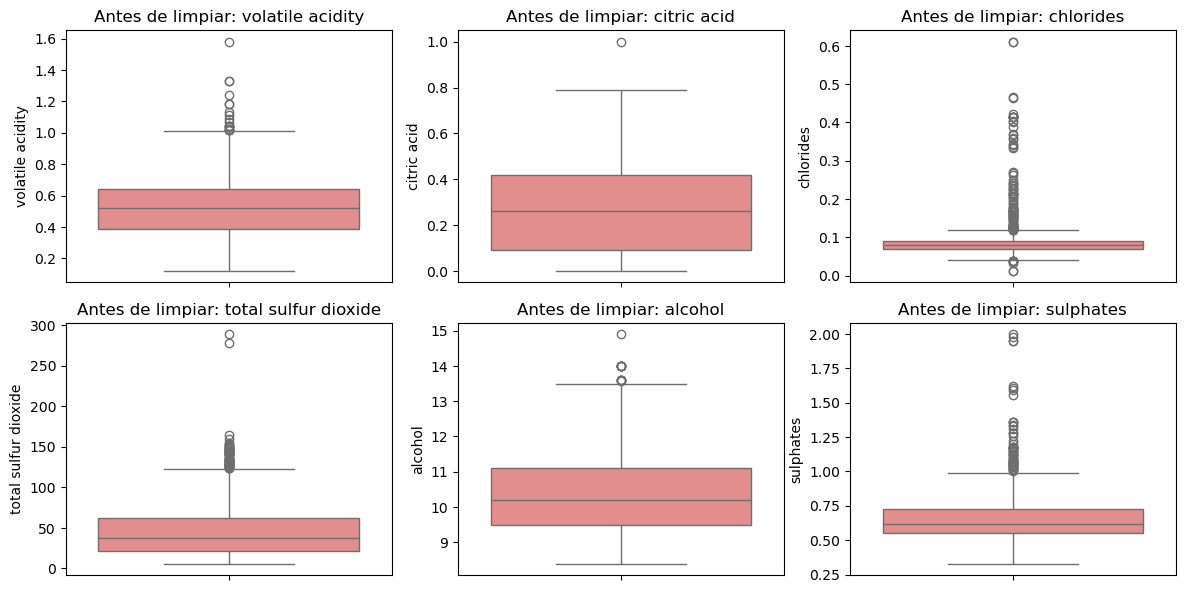

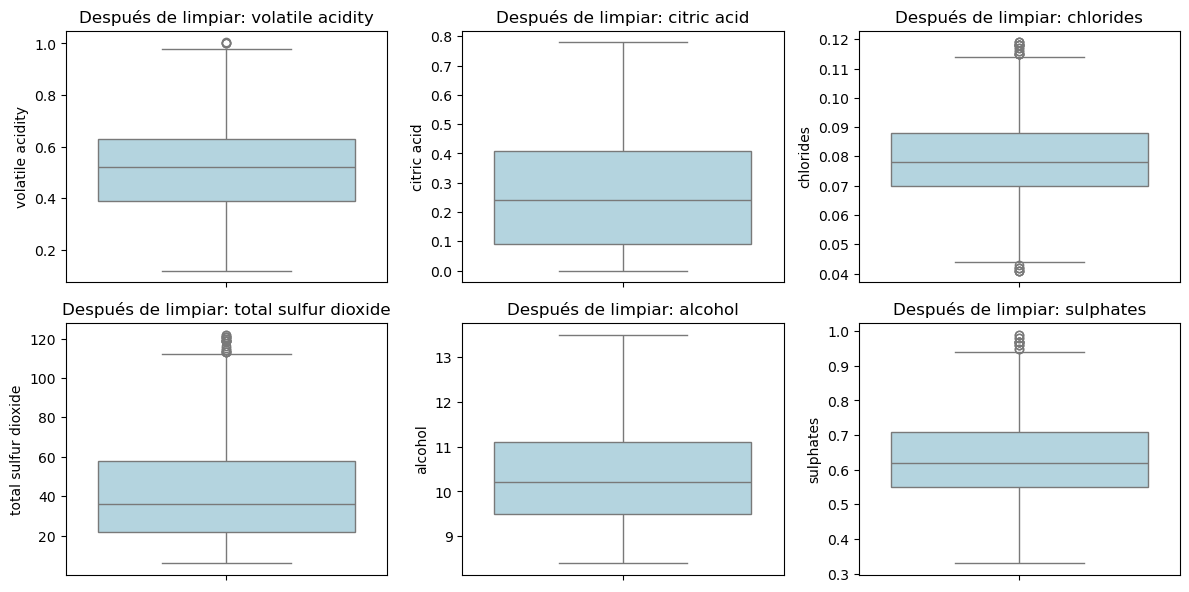

In [12]:
# Gráficos antes de limpiar outliers
plt.figure(figsize=(12, 6))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=data_wine, y=col, color="lightcoral")
    plt.title(f"Antes de limpiar: {col}")

plt.tight_layout()
plt.show()

# Gráficos después de limpiar outliers
plt.figure(figsize=(12, 6))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=data_wine_clean, y=col, color="lightblue")
    plt.title(f"Después de limpiar: {col}")

plt.tight_layout()
plt.show()

En los graficos de boxplot se pueden observar los valores que se quitaron por estar lejos de los valores intercuartiles designados para ser tomados como valores normales

In [14]:
# Estadísticas generales
print("\nResumen estadístico:")
data_wine_clean.describe()


Resumen estadístico:


,volatile acidity,citric acid,chlorides,total sulfur dioxide,alcohol,sulphates,quality
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,0.521721,0.260938,0.078888,42.660173,10.420767,0.635411,5.660895
std,0.166117,0.190411,0.014622,26.811260,1.019210,0.119341,0.786447
min,0.120000,0.000000,0.041000,6.000000,8.400000,0.330000,3.000000
25%,0.390000,0.090000,0.070000,22.000000,9.500000,0.550000,5.000000
50%,0.520000,0.240000,0.078000,36.000000,10.200000,0.620000,6.000000
75%,0.630000,0.410000,0.088000,58.000000,11.100000,0.710000,6.000000
max,1.005000,0.780000,0.119000,122.000000,13.500000,0.990000,8.000000


In [15]:
# Verificar valores nulos
print("\nValores nulos por columna:")
data_wine_clean.isnull().sum()


Valores nulos por columna:


volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
alcohol                 0
sulphates               0
quality                 0
dtype: int64

en la data dada y despues de retirar los valores no deseados, se observa que no tenemos datos nulos en la matrtiz registrada

(array([  4.,   0.,  42.,   0., 578.,   0., 573.,   0., 174.,  15.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

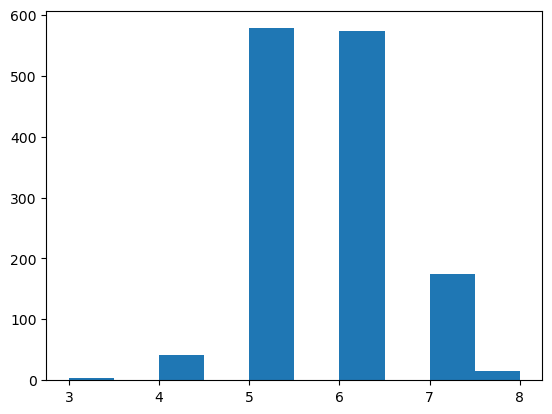

In [18]:
# grafica histograma de quality
plt.hist(data_wine_clean.quality)

En el histograma se observa que en su mayoria los vinos estudiados se encuentran entre clasificacion 5 con 578 ejempleares y clasificacion 6 con 573 ejemplares, esto nos indica que las caracterisicas principalmente se encuentra entre las de esta clasificación, con poca precensia de de vinos clasificados en nivel 3 y 8, contando con tan solo 4 y 15 ejempleares respectivamente

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

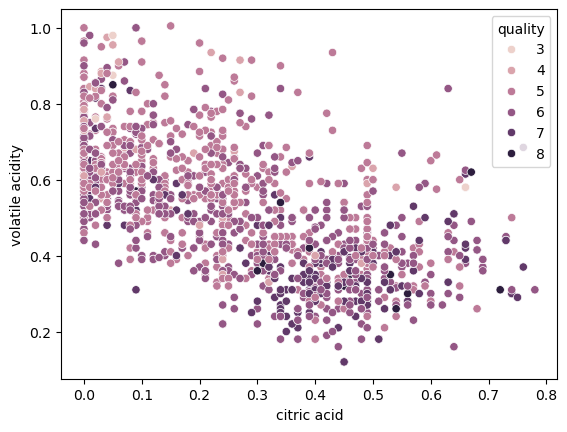

In [23]:
# Grafica diagrama de dispercion 
sns.scatterplot(x="citric acid", y="volatile acidity", hue="quality", data=data_wine_clean)

En el diagrama de dispercion  de acido citrico vs acides volatil respecto a la calidad del vino, podemos observar que a medida que el vino es de mejor calidad es porque pierde acides volatil pero aumenta su valor de acido citrico entre un 0.3 y 0.8, mostrando que el acido citrico es una elemento componente importante en la calidad del vino

<Axes: xlabel='total sulfur dioxide', ylabel='alcohol'>

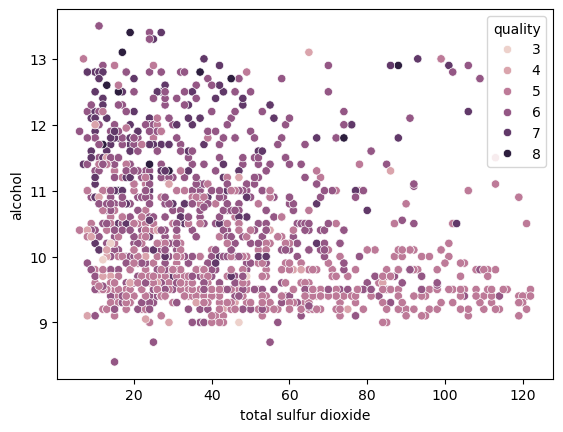

In [26]:
#grafica diagrama de dispercion
sns.scatterplot(x="total sulfur dioxide", y="alcohol", hue="quality", data=data_wine_clean)

En el diagrama de dispercion de alcohol vs dioxido de sulfuro y calidad de vino se puede inferir que los  vinos de mejor calidad preentan una mayor cantidad de alcohol y bajos voluimenes de dioxido de sulfuro, dando como caracteristica que la presencia de alcohol alta tambien muestra un buen vino

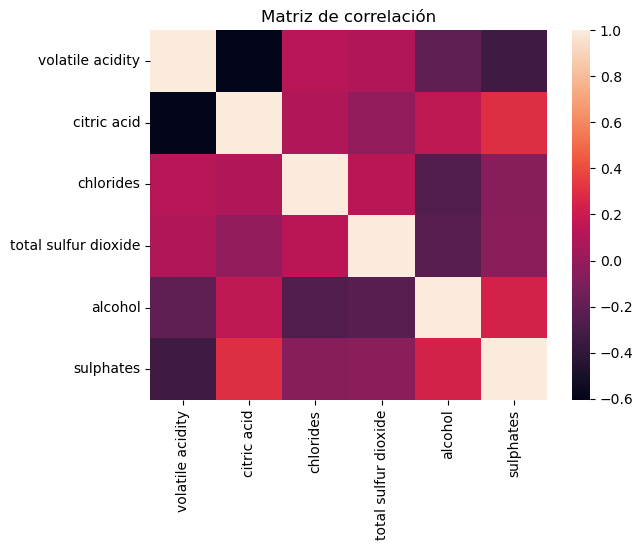

In [29]:
# Separar características (X) y variable objetivo (y)
X = data_wine_clean.drop(columns=["quality"])  # Eliminamos la columna objetivo
y = data_wine_clean["quality"]  # Variable objetivo

# Crear matriz de correlacion
corr = X.corr()
# grafico matriz de correlacion
sns.heatmap(corr)
plt.title("Matriz de correlación")
plt.show()

en la matriz de correlación no se encuentra correlaciones cercanas a 1, lo que nos indica que cada caracterisca trabaja por aparte para dar su puntuación en la evalucion final del vino y no depende de otra. 

In [32]:
# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de prueba:", X_test.shape)


Tamaño de los datos de entrenamiento: (1108, 6)
Tamaño de los datos de prueba: (278, 6)


separamos los datos en entrenamiento y prueba con una division de 80% y 20% respectivamente

In [35]:
# Definir los hiperparámetros a probar
parametros = {
    "max_depth": [3, 5, 10, None],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 3, 5],  # Mínimo de muestras por hoja
    "criterion": ["gini", "entropy"]  # Criterio de división
}

# Configurar la búsqueda de hiperparámetros
modelo_base = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(modelo_base, parametros, cv=3, scoring="accuracy", n_jobs=-1)

# Entrenar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Crear y entrenar el arbol con los hiperparámetros
modelo_optimizado = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
modelo_optimizado.fit(X_train, y_train)


Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

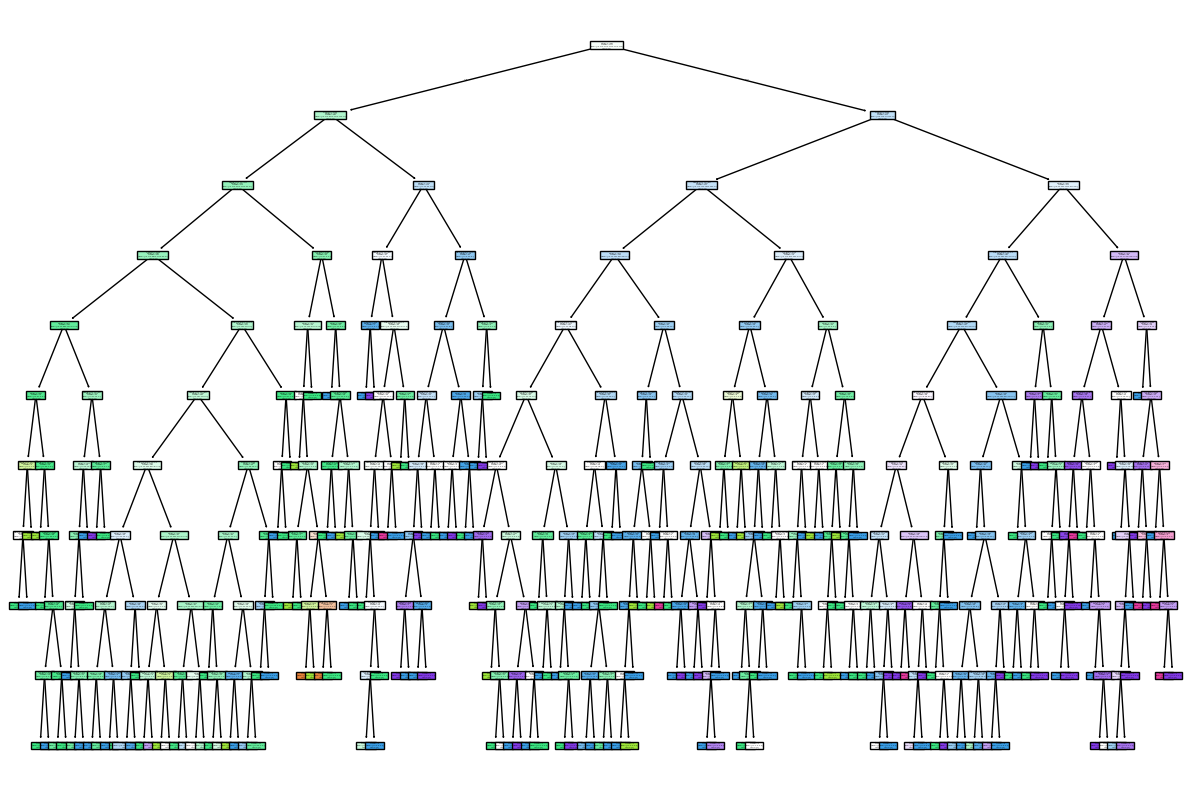

In [36]:
# Crear y entrenar el modelo
#tree = DecisionTreeClassifier(random_state=42)

# Graficar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(modelo_optimizado, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [39]:
# Hacer predicciones
predicciones = modelo_optimizado.predict(X_test)
#Examinar la matriz de confusion
pd.crosstab(y_test.values, predicciones, rownames=["Actual"], colnames=["Predicciones"])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,1,3,2,1,0
5,2,4,84,13,1,0
6,0,4,51,56,18,1
7,0,0,4,8,21,0
8,0,0,0,1,2,0


In [41]:
# Evaluación del modelo

print("\nExtactitud del modelo:", accuracy_score(y_test, predicciones))
print("\nPrecisión del modelo:", precision_score(y_test, predicciones,average='weighted'))
print("\nSencibilidad del modelo:", recall_score(y_test, predicciones,average='weighted'))
print("\nF1 del modelo:", f1_score(y_test, predicciones,average='weighted'))



Extactitud del modelo: 0.5827338129496403

Precisión del modelo: 0.605365923805702

Sencibilidad del modelo: 0.5827338129496403

F1 del modelo: 0.5724495384376205
